In [25]:
import tensorflow as tf
import keras
mnist = tf.keras.datasets.mnist

In [26]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
#How many images are in the Fashion MNIST dataset?
len(x_train)+len(x_test)

70000

In [29]:
#normalize
x_train=x_train/255.0
x_test=x_test/255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

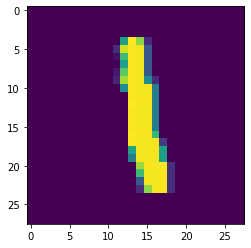

In [30]:
#Show the image
import matplotlib.pyplot as plt
plt.imshow(x_train[6])
print(x_train[6])

In [31]:
#Create layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [32]:
#Model Configuration
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
#Callback function
class Callback99(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>=0.99):
            print('\nReached 99% accuracy so stopping training!')
            self.model.stop_training=True
            
callbacks=Callback99()

In [34]:
#Model fitting. Note: callbacks implements early stopping criteria
model.fit(x_train, y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2614 - acc: 0.9246
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1146 - acc: 0.9657
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0798 - acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0590 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0464 - acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0372 - acc: 0.9884
Epoch 7/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0286 - acc: 0.9911
Reached 99% accuracy so stopping training!
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0286 - acc: 0.9911


In [35]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0694 - acc: 0.9790


[0.06940759524543537, 0.979]